## HiC to RCMC 


In [1]:

def interaction_file(interact_matrix,hic_file,hic_res,size,d_factor,l_res):
    filename = os.path.splitext(os.path.basename(hic_file))[0]
    pwd = "/gpfs/commons/home/cangel/g2lab/projects/01_12_23_highResolutionHiC/scripts/ParameterTuning"
    LR_F = int((hic_res * l_res) / 1000)
    if(clamp_n != True):
        output_dir = os.path.join(pwd, 
                    "results", 
                    "input_matrices", 
                    "{}_data_{}_resolution_{}_Mb_{}_downSample_{}_kb_LR".format(
                        filename, 
                        hic_res, 
                        size, 
                        d_factor, 
                        LR_F ))
    if(clamp_n == True):
        norm_type = "clamp"
        output_dir = os.path.join(pwd, 
                    "results_RCMC",norm_type, 
                    "input_matrices", 
                    "{}_data_{}_resolution_{}_Mb_{}_downSample_{}_kb_LR".format(
                        filename, 
                        hic_res, 
                        size, 
                        d_factor, 
                        LR_F ))
        
    os.makedirs(output_dir, exist_ok=True)

    rm = (int(hic_res)/100)/2 #radius in amstrongs

    pn = "interaction_matrix_"+filename+".txt"
    p = os.path.join(output_dir,pn)
    p2n = "int_mat_seg_len_"+filename+".txt"
    p2 = os.path.join(output_dir,p2n)
    p3n = "whole_matrix_"+filename+".txt" #whole matrix is normalized
    p3 = os.path.join(output_dir,p3n)

    Path(p).touch(exist_ok=True)

    #l = [str(i*l_res)+" "+str((i+1)*l_res-1)+" "+str(j*l_res)+" "+str((j+1)*l_res-1)+" "+str((interact_matrix[4])[i][j])+"\n" for j in range(1,(interact_matrix[4]).shape[0]) for i in range(j)]
    #Giving only interactions that do not have 0 as value
    l = []

    for j in range(1, interact_matrix[1].shape[0]):
        for i in range(j):
            if interact_matrix[1][i][j] != 0:
                s = str(i*l_res) + " " + str((i+1)*l_res-1) + " " + str(j*l_res) + " " + str((j+1)*l_res-1) + " " + str(interact_matrix[1][i][j]) + "\n"
                l.append(s)
    
    m = ((interact_matrix[0]).shape[0]-1)*[str(2*rm)+"\n"]
    n = np.asarray(interact_matrix[0])



    with open(p, "w+") as f:
        f.writelines(l)

    with open(p2, "w+") as g:
        g.writelines(m)

    np.savetxt(p3, n, delimiter=" ")
    print(len(m), len(l), n.shape[0])


In [3]:
import cooler
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import seaborn as sns
import cooltools.lib.plotting
from pathlib import Path
import numpy as np
import os
import sys
import pandas as pd

#pcSAC module
import reconstruct

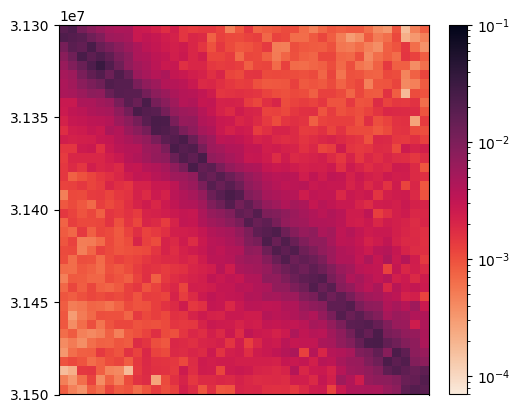

In [3]:
file_path="/gpfs/commons/home/cangel/g2lab/projects/01_12_23_highResolutionHiC/data/hic_datasets/GSE96107/GSE229113_HiC_ES_chr5.5kb.cool"
clr = cooler.Cooler(file_path)
region = 'chr5:31,300,000-31,500,000'
matrix = clr.matrix().fetch(region)
start, end = 31_300_000, 31_500_000 # same coordinates as 'region' above, now for setting the plotted viewing window
extents = (start, end, end, start)
norm_balanced = LogNorm(vmax=0.1,vmin=0.00007)
# logarithmic bounds for cont
fig, ax = plt.subplots()
cax = ax.matshow(
    clr.matrix(balance=True).fetch(region),
    cmap='rocket_r',
    norm=norm_balanced,
    extent=extents
)

ax.set_xticks([])


# Add colorbar
plt.colorbar(cax, fraction=0.046, pad=0.04)

plt.show()

In [4]:
P = clr.matrix().fetch(region)
P = np.nan_to_num(P)

rcmc = "/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool"
res = 1000
clr = cooler.Cooler(str(rcmc) + '::resolutions/' + str(res))
region = 'chr5:31,300,000-31,500,000'
M = clr.matrix().fetch(region)
M = np.nan_to_num(M)

interact_matrix = M,P
hic_file = file_path
res=1000
size = 31500000 - 31300000
d_factor = 1
l_res = 5
clamp_n = True

#interaction_file(interact_matrix,hic_file,res,size,d_factor,l_res)

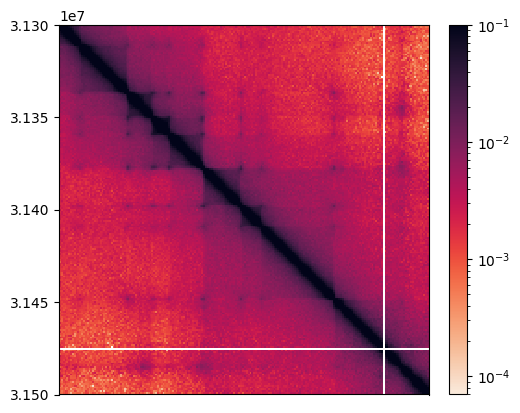

In [5]:
start, end = 31_300_000, 31_500_000 # same coordinates as 'region' above, now for setting the plotted viewing window
extents = (start, end, end, start)
norm_balanced = LogNorm(vmax=0.1,vmin=0.00007)# logarithmic bounds for cont
fig, ax = plt.subplots()
cax = ax.matshow(
    M,
    cmap='rocket_r',
    norm=norm_balanced,
    extent=extents
)

ax.set_xticks([])

# Add colorbar
plt.colorbar(cax, fraction=0.046, pad=0.04)

plt.show()

In [6]:
import reconstruct
import pandas as pd

chains = "/gpfs/commons/home/cangel/g2lab/projects/01_12_23_highResolutionHiC/scripts/ParameterTuning/results_RCMC/clamp/restrictions/HiC2RCMC_1kb"
files = sorted([f for f in os.listdir(chains) if os.path.isfile(os.path.join(chains, f))])
print(len(files))
chain_v = 10000
dc = 19
interactions = reconstruct.read_results(chains,chain_v,dc)


2848


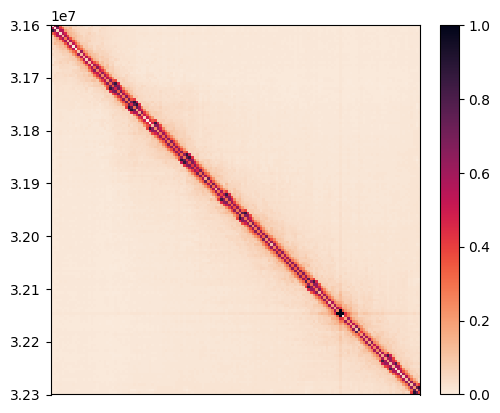

In [15]:
O = abs(M_N - interactions)
fig, ax = plt.subplots()
cax = ax.matshow(
    O,
    cmap='rocket_r',
    extent=extents
)

ax.set_xticks([])
plt.colorbar(cax, fraction=0.086, pad=0.04)

plt.show() 

## MicroC to RCMC

In [22]:
microC_path = "/gpfs/commons/home/cangel/g2lab/projects/01_12_23_highResolutionHiC/data/MicroC/"
file_path= microC_path + "GSE130275_mESC_WT_combined_1.3B.mcool"
microC_res = 3200

x =cooler.Cooler(str(file_path) + '::12/')
x.info

#x.to_cool(str(microC_path) + "GSE130275_mESC_WT_combined_1.3B_3200.cool")


{'bin-size': 3200,
 'bin-type': 'fixed',
 'creation-date': '2018-08-05T17:11:14.702369',
 'format': 'HDF5::Cooler',
 'format-url': 'https://github.com/mirnylab/cooler',
 'format-version': 2,
 'generated-by': 'cooler-0.7.10',
 'genome-assembly': 'unknown',
 'metadata': {},
 'nbins': 851740,
 'nchroms': 22,
 'nnz': 365113289,
 'sum': 1300670275}

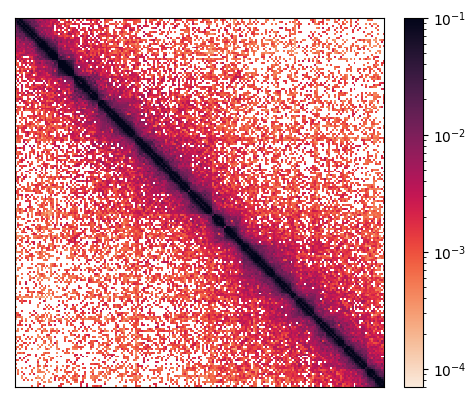

In [16]:
import seaborn as sns
res = 3200 #resolution of the MicroC data
clr = cooler.Cooler(str(file_path) + '::14/')
region = 'chr8:84,823,371-84,973,371' # example mm39 coordinates for visualizing microcompartments in the Klf1 region, for fetching the region
start, end = 84_823_371, 84_973_371
P = clr.matrix(balance=True).fetch(region)
P = np.nan_to_num(P)

extents = (start, end, end, start)
norm_balanced = LogNorm(vmax=0.1,vmin=0.00007)
# logarithmic bounds for cont
fig, ax = plt.subplots()
cax = ax.matshow(
    P,
    cmap='rocket_r',
    norm=norm_balanced,
    extent=extents
)

ax.set_xticks([])
ax.set_yticks([])

# Add colorbar
plt.colorbar(cax, fraction=0.046, pad=0.04)

plt.show()

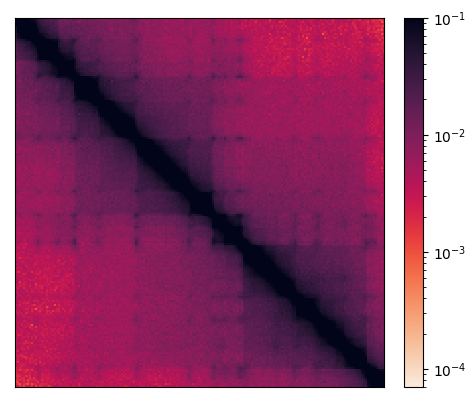

In [9]:
rcmc = "/gpfs/commons/groups/gursoy_lab/ajoglekar/Projects/2023_02_28_spliC/2023_02_28_v0_dataGathering/RCMC_data/GSM6281849_RCMC_BR1_merged_allCap_WT_mm39.merged.50.mcool"
res = 800
clr = cooler.Cooler(str(rcmc) + '::resolutions/' + str(res))
region = 'chr8:85,550,000-85,700,000'
M = clr.matrix().fetch(region)
M = np.nan_to_num(M)
start, end = 85_550_000, 85_700_000 # same coordinates as 'region' above, now for setting the plotted viewing window

extents = (start, end, end, start)
norm_balanced = LogNorm(vmax=0.1,vmin=0.00007)
# logarithmic bounds for cont
fig, ax = plt.subplots()
cax = ax.matshow(
    M,
    cmap='rocket_r',
    norm=norm_balanced,
    extent=extents
)

ax.set_xticks([])
ax.set_yticks([])

# Add colorbar
plt.colorbar(cax, fraction=0.046, pad=0.04)

plt.show()

In [7]:
interact_matrix = (M,P)
hic_file = file_path
res= 800
size = 85700000 - 85550000
d_factor = 1
l_res = 4
clamp_n = True

#interaction_file(interact_matrix,hic_file,res,size,d_factor,l_res)

In [10]:
chains = "/gpfs/commons/home/cangel/g2lab/projects/01_12_23_highResolutionHiC/scripts/ParameterTuning/results_RCMC/clamp/restrictions/MicroC2RCMC_800_10kchains_1to1/"
files = sorted([f for f in os.listdir(chains) if os.path.isfile(os.path.join(chains, f))])
print(len(files))
chain_v = 10000
dc = 8
interactions = reconstruct.read_results(chains,chain_v,dc)


10000


In [20]:
x = np.matrix(interactions[:-4, :-4])
x.shape

(188, 188)

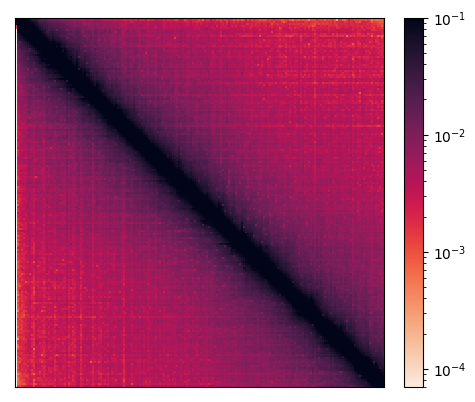

In [12]:
fig, ax = plt.subplots()
cax = ax.matshow(
    x,
    cmap='rocket_r',
    norm=norm_balanced,
    extent=extents
)


ax.set_xticks([])
ax.set_yticks([])

plt.colorbar(cax, fraction=0.086, pad=0.04)

plt.show() 

In [13]:
def genomic_metric(dict1, dict2):
    shared_keys = set(dict1.keys()).intersection(dict2.keys())
    result = {}
    from sklearn.metrics import mean_squared_error
    for key in shared_keys:
        vector1 = dict1[key]
        vector2 = dict2[key]
        r = mean_squared_error(vector1, vector2)
        result[key] = r

    return result
        
def GenomicDistance_correlation(reconstructed_matrix, whole_M,resolution):
    df_rec = reconstruct.matrix2df(reconstructed_matrix)
    df_whole = reconstruct.matrix2df(whole_M)

    gdist_rec = reconstruct.genomicDistance(df_rec, resolution)
    gdist_org = reconstruct.genomicDistance(df_whole, resolution)


    cs_gd = genomic_metric(gdist_rec, gdist_org)
    min_val = resolution
    max_val = resolution * 150
    cs_gd_sel = {k: v for k, v in cs_gd.items() if min_val <= k <= max_val}

    return cs_gd_sel


In [21]:
resolution = 800
gd = GenomicDistance_correlation(x, M,resolution)
gd_ds = GenomicDistance_correlation(P, M,resolution)  

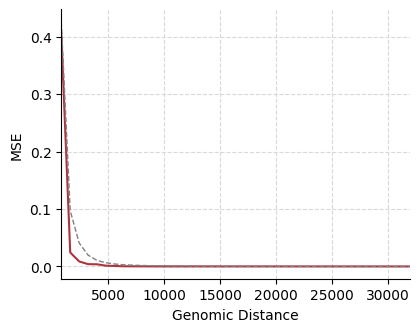

In [24]:
min_val = resolution 
max_val = resolution * 40
lists = sorted(gd.items())
lists_ds = sorted(gd_ds.items())

x, y = zip(*lists)
x_ds, y_ds = zip(*lists_ds)

plt.figure(figsize=(4.5, 3.5))

plt.plot(x, y,color='#AD343E',linewidth=1.5)
plt.plot(x_ds, y_ds,color='gray',linewidth=1,linestyle='--')

plt.xlabel('Genomic Distance')
plt.ylabel('MSE')
plt.grid(True, which="both", ls="--", c='0.85')
plt.xlim(min_val, max_val)
#plt.ylim(0, 0.3)
ax = plt.gca()  # get the current axis
for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
    